# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

# Table of contents

1. [Importing libaries & dataset](#data)
2. Explore and clean data :
    [portfolio](#portfolio)
    [profile](#profile)
    [transcript](#transcript)
3. [Exploratory analysis: Part1](#explore-part1)
4. [Exploratory analysis: Part2](#explore-part2)
5. [Feature engineering](#feature)
6. [Modeling](#model)
7. [Conclusion](#conclude)


<font color="orangered">Jump right into the <strong> 3. Exporatory Analysis</strong> part if you want to skip the data cleaning and </font>

<a id="data"></a>
# `SECTION 1`

## Importing libraries

<a id="modules"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import os.path
from tqdm import tqdm # progress bar

%matplotlib inline
%config Completer.use_jedi = False # autocomplete

In [163]:
# Scikit learn modules


[to the current workspace](#work)

## Importing data

In [122]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

---
# `SECTION 2` Exploring & cleaning data

There are three dataset to explore and clean.

<a id="portfolio"></a>
## `DATA 1` portfolio

In [ ]:
portfolio.info() 

#### Commentary

There are only 10 offers available in the data as it is a simplified version. 

For cleaning, note the following:
- no missing value exists
- date types look okay
- need to destructure `channels` column as it is list <font color="orangered">(to do)</font>
- just confirm if there is any duplicates <font color="orangered">(to do)</font>

After cleaning, I would like to return:
- a grouped by table that shows summary statistics of offers by `offer_type`

### Function to clean `portfolio` data

In [ ]:
def clean_portfolio(df):
    ''' Clean the 'portolio' dataset, achieving :
    1. Destructure 'channels' column
    2. Drop 'channels' column after destructing
    
    INPUT: a Pandas dataframe that contains portfolio data
    OUTPUT: a clean dataframe 
    '''
    
    # Get unique channels 
    temp_list = list()

    for _type in df.channels:
        temp_list.extend(_type)

    channel_list = set(temp_list)
    
    
    # Create binary tables for channels
    channel_bool = dict()

    for _type in channel_list:
        channel_bool[_type] = df.channels.apply(lambda x: _type in x)
    
    channel_df = pd.DataFrame(channel_bool)
    
    
    # Transform boolean to binary integer (True: 1, False: 0)
    binary_rule = {True: 1, False: 0}
    
    for col in channel_df.columns:
        channel_df[col] = channel_df[col].map(binary_rule) 
       
    # Join the binary columns to the original dataframe
    df_clean = df.join(channel_df)
    
    # Drop 'channels' columns
    df_clean = df_clean.drop(columns='channels')
    
    
    return df_clean
    

In [ ]:
# Clean portfolio dataframe
portfolio_v1 = clean_portfolio(portfolio)
portfolio_v1

In [ ]:
# Check for duplicates
assert portfolio_v1.duplicated().sum() == 0, "There is at least one duplicated offer"

In [ ]:
# Printing stats table including channels
portfolio_v1.groupby('offer_type').mean()

#### Commentary:

Customers gets the most reward from `bogo` it is less difficult to redeem than `discount` which requires more spends. 

When sending out offers, `email` is opted always. `bogo` looks the most aggressive offer utilising the 4 channels the most (just as it sounds).

In [ ]:
# Saving the cleand dataframe as 'portfolio_v1'
portfolio_v1.to_csv('data/portfolio_v1.csv', index=False)

<a id="profile"></a>
## `DATA 2` profile

In [ ]:
profile.head(3) 

In [ ]:
# Check for duplicates by id
assert profile.duplicated(subset='id').sum() == 0, "There is at least one duplicated record"

In [ ]:
# 2175 records with null data 
# age of 118 is odd so to remove
print(profile[profile.gender.isnull()].head(3))
profile[profile.gender.isnull()].age.value_counts() 

#### Commentary

There is no duplicated id. `profile` data contains all unique user ids.

For cleaning, note the following:
- 2175 missing value exists in `gender`, `income` columns: contain age of 118 which is abnormal <font color="orangered">(drop them) - 12.7% of the data</font>
- `become_member_on` to be converted to datetime object

### Function to clean `profile` data

In [ ]:
def clean_profile(df):
    ''' Clean the 'portolio' dataset, achieving :
    1. Drop nulls
    2. Convert 'become_member_on' to datetime object
    
    INPUT: a Pandas dataframe that contains profile data
    OUTPUT: a clean dataframe 
    '''
    
    # Copy the original dataframe
    df_clean = df.copy()
    
    # Drop nulls
    df_clean = df_clean[df_clean.gender.notnull()]
    
    # Convert to datetime object
    df_clean.loc[:, 'became_member_on'] = pd.to_datetime(df_clean.became_member_on, format="%Y%m%d")
    
    return df_clean


In [ ]:
# Check for any remaining null data 
assert profile_v1.shape[0] == profile.shape[0] - 2175, "It looks that missing values are not dropped correctly"
assert profile_v1.isnull().sum().sum() == 0, "There still is missing value"

In [ ]:
# Save the clean data as profile_v1
profile_v1.to_csv('data/profile_v1.csv', index=False)

<a id="transcript"></a>
## `DATA 3` transcript

In [ ]:
transcript.info()

In [ ]:
transcript.head()

In [ ]:
transcript.event.value_counts()

### Quick inspection of the `value` column

In [ ]:
# Destructoring dictionary in 'value' column 
temp = transcript.copy()

In [ ]:
# Extract unique keys from the dictionary
value_keys = []

for _dict in temp.value:
    for keys in _dict.keys():
        value_keys.append(keys)
        
print(set(value_keys))

#### Commentary

There are 3 unique keys in the dictionary, while `offer_id` and `offer id` should give the same information. 

- We need destructuring the dictionary first 
- Then combine `offer_id` and `offer id` column together into `offer_id` column
- drop `offer id` column

In [ ]:
# Quick way to destructure using 'json_normalize' method
value_destructured = pd.json_normalize(temp['value'])
value_destructured

In [ ]:
# Merge 'offer_id' and 'offer id' columns 
# np.where(condition, value if true, value if false)
value_destructured['offer_id'] = np.where(value_destructured['offer id'].notnull(), 
                                          value_destructured['offer id'], 
                                          value_destructured['offer_id'])

# Drop the unnecessary offer id column if merger successful
assert value_destructured['offer_id'].notnull().sum() == 167581, "It is an incorrect merge"
value_destructured = value_destructured.drop(columns='offer id')

In [ ]:
# Inspecting amount column
print('Number of transactions made: ', value_destructured.amount.notnull().sum(), end='\n\n')
print(value_destructured.amount.describe())

sns.histplot(x=value_destructured.amount, binwidth=5); # every $5
plt.title('Distribution of transaction amounts');
plt.xlim([0,100]); # removing outliers i.e. max value of $1062.28

In [ ]:
# Transation value over $100 (hidden from the graph above)
print(f'#trans over $100: {(value_destructured.amount > 100).sum()}')
print(f'  in percentage: {(value_destructured.amount > 100).sum() / 138953 * 100:.2f}%')

Most of the amounts fall below $100 with some outliers that are minor enough to be ignored. Note that transaction values here includes those purchased with no offers as well.

In [ ]:
# Inspecting reward column
print('Total number of rewards given:', len(value_destructured.reward.notnull()))

sns.countplot(x=value_destructured.reward);
plt.title('Rewards given for completing offers and their counts');

Rewards are given for offers that are completed. Therefore, it must correspond to `offer completed` events only. Reward 5 has been given the most followed by reward 2. 

#### Commentary - `transcript` data:

There are four types of event following marketing funnels. As mentioned earlier an offer can be completed without receiving / viewing offer. Also, transaction can happen with no offer redeemed.

No missing data is found in `transcript` data. However, after destructuring `value` column many null values are generated, which is to address no transactions / rewards and delivers a correct picture - no need to drop.
 
For cleaning, 
- destructor dictionary in `value` column <font color="orangered">(to do)</font>
- make the keys of the ditionary in `value` column consistent <font color="orangered">(to do)</font>
- drop the original `value` column <font color="orangered">(to do)</font>

### Function to clean `transcript` data

In [ ]:
def clean_transcript(df):
    ''' Clean the 'transcript' dataset, achieving :
    1. Destructure dictionary in 'value' column & create a new dataframe
    2. Ensure consistency by merging offer_id with offer id column
    3. Drop the duplicated offer id column
    3. Join the new dataframe to the original transcript dataframe
    4. Drop the original 'value' column

    INPUT: a Pandas dataframe that contains transcript data
    OUTPUT: a clean dataframe 
    '''
    
    # Instantiate df_clean as a copy of df
    df_clean = df.copy()
    
    # Destructoring dictionary in 'value' column 
    value_df = pd.json_normalize(df.value)
    
    # Making values in 'value_key' column consistent + testing the result
    # 'offer id' column merged 'offer_id' & test the change

    # For testing, the merged column size should match sum of count 1 & 2
    count1 = value_df['offer_id'].notnull().sum()
    count2 = value_df['offer id'].notnull().sum()
    
    value_df['offer_id'] = np.where(value_df['offer id'].notnull(), 
                                    value_df['offer id'], value_df['offer_id'])
    
    # Testing if merged successfully
    assert value_df['offer_id'].notnull().sum() == count1 + count2
    
    # Drop offer id column
    value_df = value_df.drop(columns='offer id')

    df_clean = df_clean.join(value_df)
    
    # Drop the original 'value' column
    df_clean = df_clean.drop(columns='value')
    
    
    return df_clean
    

In [ ]:
# Returning the clean dataframe
transcript_v1 = clean_transcript(transcript)
transcript_v1

### Post cleaning inspection for `transcript_v1`

In [ ]:
# If there is a value in 'amount', it should be about transaction
assert transcript_v1[transcript_v1.amount.notnull()].event.unique()[0] == 'transaction'

In [ ]:
# Check for duplicates by 'person' and 'value_key'
transript_v1_duplicated = transcript_v1[transcript_v1.duplicated(keep=False)]
transript_v1_duplicated

In [ ]:
# Duplicated event 
transript_v1_duplicated.event.hist();

In [ ]:
# Inspection for duplicates with a sample 
sample = transcript_v1[transcript_v1.person == 'b7e216b6472b46648272c29a52a86702']
sample

#### Commentary
About 397 fields (793 rows / 2) have duplicated records and it happends for `offer completed` event only. 

The above sample data shows the same type of duplication (idx# 305550, 305551). The duplicated fields do not really convery any meaningful data so drop duplicates (keep first).

### Drop duplicates in `transcript_v1`

In [ ]:
print(f'Before dropping duplicates: {transcript_v1.shape[0]} records')
print(f'Total {transcript_v1.duplicated().sum()} duplicates exist')

In [ ]:
transcript_v1 = transcript_v1.drop_duplicates(keep='first')

In [ ]:
# Confirm the changes
assert transcript_v1.shape[0] == 306534 - 397, "There is something wrong"

In [ ]:
# Save the clean data as transcript_v1
transcript_v1.to_csv('data/transcript_v1.csv', index=False)

### `transcript_v1` - further cleaning needed!
Before any explatory analysis, we need a further cleaning of `transcript_v1` dataframe in order to clearly identify how funnels work and customers react to offers.

As instructed in the introdution, transactions can be made without customers actually viewing offers, which does not really tell that customers were influenced by the offers.

Therefore, we need to work on:
1. Make `event` column categorical ordered
2. Fill NaN value in `offer_id` for `transaction` made as a result of offer completion
3. Pivot `transcript_v1` to see which offer / person completed offer or not

The explanation here may not sound clear. So, I will explain the work along the way.

In [23]:
transcript_v1 = pd.read_csv('data/transcript_v1.csv')
portfolio_v1 = pd.read_csv('data/portfolio_v1.csv')

#### Re-order event
It is understood that when an offer is completed, it follows funnles like below:  
    
    'offer received' -> 'offer viewed' ->'transaction' -> 'offer completed'

<font color="orangered">It is important to note that there are two offers that are informational. These two offers have only two events: offer received and offer viewed. </font> 

In [37]:
# Get offer_id for the two information offer types
information_ids = portfolio_v1[portfolio_v1['offer_type'] == 'informational']['id'].to_list()
information_ids

['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837']

In [40]:
# Events for informational offers
transcript_v1[transcript_v1['offer_id'].isin(information_ids)]['event'].unique()

array(['offer received', 'offer viewed'], dtype=object)

For the ease of analysis, we transform `event` column categorical, ordered following funnels.

In [41]:
# Transform event column into categorical ordered dtype
funnel_order = ['offer received', 'offer viewed', 'transaction', 'offer completed']
transcript_v1.event = pd.Categorical(transcript_v1.event, categories=funnel_order, ordered=True)

In [42]:
# Sorting the dataframe by person, offer_id and then event
# will represent dataframe in order of event(funnel) for each offer
transcript_sorted = transcript_v1.sort_values(by=['person', 'offer_id', 'time', 'event'],
                                              ascending=True)
transcript_sorted

,person,event,time,amount,offer_id,reward
247632,0009655768c64bdeb2e877511632db8f,offer received,576,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
258632,0009655768c64bdeb2e877511632db8f,offer completed,576,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
113591,0009655768c64bdeb2e877511632db8f,offer received,336,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139973,0009655768c64bdeb2e877511632db8f,offer viewed,372,NaN,3f207df678b143eea3cee63160fa8bed,NaN
55972,0009655768c64bdeb2e877511632db8f,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
...,...,...,...,...,...,...
200113,ffff82501cea40309d5fdd7edcca4a07,transaction,498,13.17,NaN,NaN
214570,ffff82501cea40309d5fdd7edcca4a07,transaction,504,7.79,NaN,NaN
258113,ffff82501cea40309d5fdd7edcca4a07,transaction,576,14.23,NaN,NaN
274495,ffff82501cea40309d5fdd7edcca4a07,transaction,606,10.12,NaN,NaN


For later reference, create a function that facilitates the search of transaction details by a person's id.

In [43]:
def transaction_details(_id, df=transcript_v1):
    ''' To faciliate the search of transaction details of a customer.
    Firstly sorting 
    
    INPUT: 
        person_id: an id of a customer in the dataset
        df: default as the cleaned transcript (v1) dataframe.
    
    '''
    
    # Copy the input dataframe
    df_new = df.copy()
    
    # Transform event column into categorical ordered dtype
    funnel_order = ['offer received', 'offer viewed', 'transaction', 'offer completed']
    df_new.event = pd.Categorical(df_new.event, categories=funnel_order, ordered=True)
    
    # Get the data that corresponds to the input customer id
    df_ind = df_new[df_new.person == _id]
    
    return df_ind
    
    # Sorting the dataframe by offer_id, time and then event
    # will represent dataframe in order of event(funnel) for each offer
    df_ind = df_ind.sort_values(by=['offer_id', 'time', 'event'])

    return df_ind                               

In [44]:
transaction_details('ffff82501cea40309d5fdd7edcca4a07')

,person,event,time,amount,offer_id,reward
1393,ffff82501cea40309d5fdd7edcca4a07,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
15836,ffff82501cea40309d5fdd7edcca4a07,offer viewed,6,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
32762,ffff82501cea40309d5fdd7edcca4a07,transaction,60,16.06,NaN,NaN
32763,ffff82501cea40309d5fdd7edcca4a07,offer completed,60,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0
37060,ffff82501cea40309d5fdd7edcca4a07,transaction,78,7.18,NaN,NaN
45575,ffff82501cea40309d5fdd7edcca4a07,transaction,120,9.12,NaN,NaN
54574,ffff82501cea40309d5fdd7edcca4a07,offer received,168,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
69621,ffff82501cea40309d5fdd7edcca4a07,offer viewed,174,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
79660,ffff82501cea40309d5fdd7edcca4a07,transaction,198,22.88,NaN,NaN
79661,ffff82501cea40309d5fdd7edcca4a07,offer completed,198,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0


#### Commentary:
The below method correctly sorts each offer by order of funnel. The rows with `transaction` does not contain offer_id. Therefore they need to be split and merged back after labeling complete offer. They can be merged on `time` of offer completed event which is exactly same as time of corresponding transaction.

#### Splitting rows that contain `transaction` event

In [45]:
# Split rows with 'transaction' event
transaction_df = transcript_sorted[transcript_sorted.event == 'transaction']

# Remove transaction from transcript_sorted dataframe
transcript_sorted = transcript_sorted[transcript_sorted.event != 'transaction']

In [46]:
# Confirm the change
assert (transcript_sorted.event == 'transaction').sum() == 0, "There still is a row with transaction event."
assert (transcript_sorted.offer_id.isnull().sum()) == 0, "There is a missing record in offer_id column"

#### Pivot transcript_sorted to label offer complete / incomplete
In order to make pivoting less complex, `reward` column (where event == `offer completed`) will be put aside. It will later be added after labeling.

In [47]:
# Subsetting reward (offer completed)
reward_df = transcript_v1[transcript_v1.event == 'offer completed']

In [48]:
# Remove reward column and subset transcript sorted dataframe
transcript_subset = transcript_sorted[['person', 'offer_id', 'time', 'event']]

# Pivot the subsetted dataframe 
# Group by and return the minimum time (the earliest) value 
offer_by_customer = transcript_subset.groupby(['person', 'offer_id', 'event']).min().unstack()
offer_by_customer.head()

time  \
event                                                             offer received   
person                           offer_id                                          
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7            NaN   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2            NaN   
                                 2906b810c7d4411798c6938adc9daaa5          576.0   
                                 3f207df678b143eea3cee63160fa8bed          336.0   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0            NaN   

                                                                                \
event                                                             offer viewed   
person                           offer_id                                        
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7          NaN   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2          NaN   
                                 2906b810c7d4411798c6938adc9daaa5          NaN   
                                 3f207df678b143eea3cee63160fa8bed        372.0   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0          NaN   

                                                                               \
event                                                             transaction   
person                           offer_id                                       
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7         NaN   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2         NaN   
                                 2906b810c7d4411798c6938adc9daaa5         NaN   
                                 3f207df678b143eea3cee63160fa8bed         NaN   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0         NaN   

                                                                                   
event                                                             offer completed  
person                           offer_id                                          
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7             NaN  
                                 2298d6c36e964ae4a3e7e9706d1fb8c2             NaN  
                                 2906b810c7d4411798c6938adc9daaa5           576.0  
                                 3f207df678b143eea3cee63160fa8bed             NaN  
                                 4d5c57ea9a6940dd891ad53e9dbe8da0             NaN

#### Commentary:
The pivoted dataframe `is_offer_complete` contains multi-layered index and column. It contains all 10 offer types (represented by `offer_id`) per each person. 

When it comes to column, `time` and `event` features are multi-layered, which will need a further processing in the following section.

In [49]:
# Inspect if all persons have 10 offers using progress bar

member_ids = transcript_subset.person

for _id in tqdm(member_ids):
    assert offer_by_customer.loc[_id].shape[0] == 10

100%|██████████| 167184/167184 [00:45<00:00, 3637.63it/s]


Yes indeed! This will allow us to check which offer has actually been sent and which hasn't

#### Reset multi-index and drop 'transaction' column
The multi-index column can be reset. Also `transaction` is regenerated as it is part of the categorical `event` column. To faciliate the labeling, we can drop it. Also, 

In [50]:
# Resetting multi-index column
offer_by_customer.columns = offer_by_customer.columns.droplevel(0)

In [51]:
# Check if transaction column has any non-null value
assert offer_by_customer['transaction'].notnull().sum() == 0, 'There is a non-null value in transaction column'

# Drop the transaction column
offer_by_customer = offer_by_customer.drop(columns='transaction')

In [52]:
offer_by_customer

event                                                              offer received  \
person                           offer_id                                           
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7             NaN   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2             NaN   
                                 2906b810c7d4411798c6938adc9daaa5           576.0   
                                 3f207df678b143eea3cee63160fa8bed           336.0   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0             NaN   
...                                                                           ...   
ffff82501cea40309d5fdd7edcca4a07 5a8bc65990b245e5a138643cd4eb9837             NaN   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9           504.0   
                                 ae264e3637204a6fb9bb56bc8210ddfd             NaN   
                                 f19421c1d4aa40978ebb69ca19b0e20d             NaN   
                                 fafdcd668e3743c1bb461111dcafc2a4             0.0   

event                                                              offer viewed  \
person                           offer_id                                         
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7           NaN   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2           NaN   
                                 2906b810c7d4411798c6938adc9daaa5           NaN   
                                 3f207df678b143eea3cee63160fa8bed         372.0   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0           NaN   
...                                                                         ...   
ffff82501cea40309d5fdd7edcca4a07 5a8bc65990b245e5a138643cd4eb9837           NaN   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9         534.0   
                                 ae264e3637204a6fb9bb56bc8210ddfd           NaN   
                                 f19421c1d4aa40978ebb69ca19b0e20d           NaN   
                                 fafdcd668e3743c1bb461111dcafc2a4           6.0   

event                                                              offer completed  
person                           offer_id                                           
0009655768c64bdeb2e877511632db8f 0b1e1539f2cc45b7b9fa7c272da2e1d7              NaN  
                                 2298d6c36e964ae4a3e7e9706d1fb8c2              NaN  
                                 2906b810c7d4411798c6938adc9daaa5            576.0  
                                 3f207df678b143eea3cee63160fa8bed              NaN  
                                 4d5c57ea9a6940dd891ad53e9dbe8da0              NaN  
...                                                                            ...  
ffff82501cea40309d5fdd7edcca4a07 5a8bc65990b245e5a138643cd4eb9837              NaN  
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9            504.0  
                                 ae264e3637204a6fb9bb56bc8210ddfd              NaN  
                                 f19421c1d4aa40978ebb69ca19b0e20d              NaN  
                                 fafdcd668e3743c1bb461111dcafc2a4             60.0  

[169940 rows x 3 columns]

#### Labeling completed / incompleted offer
Now we have **offer received**, **offer viewed** and **offer completed** column following funnel. We label `completed` when all three columns are filled with non-null values. 

**Labeling matrix for possible mix (o: non-null value, x: null):**

| offer received | offer viewed | offer completed | label |
| --- | --- | --- | --- |
| o | o | o | completed |
| o | o | x | incomplete |
| o | x | o | incomplete |
| o | x | x | incomplete |
| x | x | x | unsent |

As inspected earlier, the dataframe contains data for offers that have not been sent to a person and we denote that as `unsent` for any future use.

In [54]:
def label_offer_by_customer(df=offer_by_customer):
    ''' Create a new dataframe that contains label column
    to represent the status of offer. The column will contain
    three labels that are 'completed', 'incomplete', 'no offer'
    
        'completed': customers has been influenced by offer when
            purchasing a product
        'incomplete': customers may have purchased a product or not
            which however was not influenced by offer
        'unsent': a particular offer has not been sent by Starbucks            
    
    INPUT: a pivoted dataframe that contains funnel information by
        customer(person) and offer(offer_id)
        
    OUTPUT: a dataframe that has either of the three labels attached    
    '''
    
    # Instantiate a copy of dataframe
    df_new = offer_by_customer.copy()

    # Change dtype categorical --> str
    # otherwise, a new column cannot be added
    df_new.columns = df_new.columns.astype(str)

    # Instantiate a new 'offer_status' column
    df_new['offer_status'] = ''
    
    for idx, rows in tqdm(df_new.iterrows(), total=df_new.shape[0]):
    
        # Set conditions to check if there is non-null value
        is_received = not math.isnan(rows['offer received'])
        is_viewed = not math.isnan(rows['offer viewed'])
        is_completed = not math.isnan(rows['offer completed'])

        # Label as per the logic spcified in the labeling matrix 
        if is_received and is_viewed and is_completed:
            df_new.loc[idx, 'offer_status'] = 'completed'

        elif is_received and is_viewed and not is_completed:
            df_new.loc[idx, 'offer_status'] = 'incomplete'

        elif is_received and not is_viewed and is_completed:
            df_new.loc[idx, 'offer_status'] = 'incomplete'

        elif is_received and not is_viewed and not is_completed:
            df_new.loc[idx, 'offer_status'] = 'incomplete'

        elif not is_received and not is_completed and not is_viewed:
            df_new.loc[idx, 'offer_status'] = 'unsent'

        else:
            df_new.loc[idx, 'offer_status'] = np.nan

    return df_new

In [55]:
offer_by_customer_labeled = label_offer_by_customer(df=offer_by_customer)

100%|██████████| 169940/169940 [05:05<00:00, 555.90it/s]


In [56]:
# Check if offer_status has null values
assert offer_by_customer_labeled.offer_status.isnull().sum() == 0, 'There is a null value'

In [57]:
# Visually check with 10 samples 
offer_by_customer_labeled.sample(10) # ok!

,event,offer received,offer viewed,offer completed,offer_status
person,offer_id,,,,
b6e152e34cc7427a8a30c02d4fbd9d49,ae264e3637204a6fb9bb56bc8210ddfd,336.0,336.0,NaN,incomplete
6e04a90a0e074496b5f229eb1f553433,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN,NaN,unsent
5ea46e14782047beb43f7b2a26e7d4e6,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,unsent
2449f2f011d24c849f72b15303f89f4b,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN,unsent
f20c3f0cf44244e185df2264889256d6,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,unsent
286424d90dee4e23a07e1f374c69a89e,4d5c57ea9a6940dd891ad53e9dbe8da0,336.0,366.0,390.0,completed
529dbd88764343b2a89758dd6c05cd29,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,unsent
1da9869eff9c44cdbac2f1e4b9567df3,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN,unsent
c91761144bce489bac76377c73b4058a,f19421c1d4aa40978ebb69ca19b0e20d,408.0,462.0,NaN,incomplete


#### Merging subsetted data 
Now we merge the earlier subsetted `amount` & `reward` information for the ease pivoting operations. They are saved in `transaction_df` & `reward_df` respectively. 

In [58]:
# Copy the original dataframe 
df_merged = offer_by_customer_labeled.copy()

# Reset index for merge 
df_merged = df_merged.reset_index()

In [59]:
df_merged.shape

(169940, 6)

`transaction_df` does not have `offer_id` so we merge based on the time that offers were completed. Also, offer_id, reward columns do not have any values other than NaN, and also event column is not unnecessary (it only has transaction as value) so drop them before the merge.

In [60]:
transaction_df = transaction_df.drop(columns=['event', 'offer_id', 'reward'])

In [61]:
# Merge the dataframes
df_merged = pd.merge(df_merged, transaction_df, how='left',
                     left_on=['person', 'offer completed'], 
                     right_on=['person', 'time'])

In [62]:
# Check if any record has been removed/added after the merge
assert df_merged.shape[0] == 169940, "There is a record lost/added from the merge"
assert df_merged[df_merged['offer completed'] != df_merged['time']]['offer completed'].sum() == 0

# Then drop duplicated column due to difference in column name
df_merged = df_merged.drop(columns='time')

In [63]:
df_merged.head()

,person,offer_id,offer received,offer viewed,offer completed,offer_status,amount
0,0009655768c64bdeb2e877511632db8f,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,unsent,NaN
1,0009655768c64bdeb2e877511632db8f,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN,unsent,NaN
2,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576.0,incomplete,10.27
3,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,372.0,NaN,incomplete,NaN
4,0009655768c64bdeb2e877511632db8f,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,unsent,NaN


There is no record lost or added after the merge which is good. However, note that the third row has a suspicious record where `offer_status` is incomplete but there still is an amount. Let's investigate them.

In [64]:
df_merged[(df_merged['offer_status'] == 'incomplete') & (df_merged['amount'].notnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4536 entries, 2 to 169906
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person           4536 non-null   object 
 1   offer_id         4536 non-null   object 
 2   offer received   4536 non-null   float64
 3   offer viewed     0 non-null      float64
 4   offer completed  4536 non-null   float64
 5   offer_status     4536 non-null   object 
 6   amount           4536 non-null   float64
dtypes: float64(4), object(3)
memory usage: 283.5+ KB


It is very clear that transaction `amount` was added to incomplete offer when a customer actually made a transaction without viewing offer (so not influenced by the offer). 

Not action yet to take and moving on with merging `reward_df` for now. `reward_df` has unncessary columns thare are `event` (only offer completed has reward) and `amount` (no value) to drop.

In [65]:
# Inspecting reward_df 
reward_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33182 entries, 12658 to 306130
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   person    33182 non-null  object  
 1   event     33182 non-null  category
 2   time      33182 non-null  int64   
 3   amount    0 non-null      float64 
 4   offer_id  33182 non-null  object  
 5   reward    33182 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [66]:
# Drop unncessary columns
reward_df = reward_df.drop(columns=['event', 'amount'])

In [67]:
# Merge with reward_df 
df_merged = pd.merge(df_merged, reward_df, how='left',
                     left_on=['person', 'offer_id', 'offer completed'], 
                     right_on=['person', 'offer_id', 'time'])

In [68]:
# Check for any added/removed records after the merge
assert df_merged.shape[0] == 169940, "There is a record lost/added from the merge"

# Then, drop duplicated column due to difference in column name
df_merged = df_merged.drop(columns='time')

In [69]:
df_merged

,person,offer_id,offer received,offer viewed,offer completed,offer_status,amount,reward
0,0009655768c64bdeb2e877511632db8f,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,unsent,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN,unsent,NaN,NaN
2,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576.0,incomplete,10.27,2.0
3,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,372.0,NaN,incomplete,NaN,NaN
4,0009655768c64bdeb2e877511632db8f,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,unsent,NaN,NaN
...,...,...,...,...,...,...,...,...
169935,ffff82501cea40309d5fdd7edcca4a07,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN,unsent,NaN,NaN
169936,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,534.0,504.0,completed,7.79,5.0
169937,ffff82501cea40309d5fdd7edcca4a07,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN,NaN,unsent,NaN,NaN
169938,ffff82501cea40309d5fdd7edcca4a07,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN,unsent,NaN,NaN


<font color="orangered">Warning</font> Row 169936 has a suspicous record where offer completed time is earlier than offer viewed time. Let's investigate.

In [70]:
# Using the custom function defined earlier
sample1 = transaction_details('ffff82501cea40309d5fdd7edcca4a07')
sample1[sample1.time > 500][:5]

,person,event,time,amount,offer_id,reward
202817,ffff82501cea40309d5fdd7edcca4a07,offer received,504,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
214570,ffff82501cea40309d5fdd7edcca4a07,transaction,504,7.79,NaN,NaN
214571,ffff82501cea40309d5fdd7edcca4a07,offer completed,504,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
230484,ffff82501cea40309d5fdd7edcca4a07,offer viewed,534,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
246248,ffff82501cea40309d5fdd7edcca4a07,offer received,576,NaN,2906b810c7d4411798c6938adc9daaa5,NaN


#### `LABELING ADJUSTMENT` Incorrect labeling

It is noticeable that the customer viewed an offer after offer completed, and then the customer was not influenced by the offer and the offer is not considered complete.

And the previous groupby operations assumed the dataframe was ordered by funnel but created a wide form pivot table with the minimum time (earliest record) so couldn't catch this exceptional case. 

There are over 3708 records that are incorrectly labeled, which need an additional adjustment.

In [71]:
df_merged[df_merged['offer viewed'] > df_merged['offer completed']]

,person,offer_id,offer received,offer viewed,offer completed,offer_status,amount,reward
8,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414.0,completed,8.57,5.0
9,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528.0,completed,14.11,2.0
101,0056df74b63b4298809f0b375a304cf4,2298d6c36e964ae4a3e7e9706d1fb8c2,576.0,654.0,576.0,completed,29.77,3.0
130,00715b6e55c3431cb56ff7307eb19675,0b1e1539f2cc45b7b9fa7c272da2e1d7,168.0,228.0,210.0,completed,28.73,5.0
132,00715b6e55c3431cb56ff7307eb19675,2906b810c7d4411798c6938adc9daaa5,504.0,564.0,534.0,completed,21.35,2.0
...,...,...,...,...,...,...,...,...
169887,fff29fb549084123bd046dbc5ceb4faa,ae264e3637204a6fb9bb56bc8210ddfd,0.0,642.0,168.0,completed,15.16,10.0
169888,fff29fb549084123bd046dbc5ceb4faa,f19421c1d4aa40978ebb69ca19b0e20d,408.0,438.0,426.0,completed,24.56,5.0
169896,fff3ba4757bd42088c044ca26d73817a,9b98b8c7a33c4b65b9aebfe6a799e6d9,168.0,210.0,168.0,completed,22.76,5.0
169926,fffad4f4828548d1b5583907f2e9906b,9b98b8c7a33c4b65b9aebfe6a799e6d9,576.0,666.0,588.0,completed,10.98,5.0


In [72]:
# Adjusting the incorrect labeling
df_merged.loc[df_merged['offer viewed'] > df_merged['offer completed'], 'offer_status'] = 'incomplete'

# Test the change
assert (df_merged.loc[df_merged['offer viewed'] > df_merged['offer completed'], 'offer_status'] != 'incomplete').sum()  == 0, "The adjustment failed..."

#### `LABELING ADJUSTMENT` Informational offer type
In the beginning, we figured that there are two information offers and they only have two possible events: offer received and offer viewed. 

Therefore, we consider it completed when the two events are made.

In [53]:
information_ids

['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837']

In [108]:
# Copy df_merged dataframe
temp = df_merged.copy()

# Save all records with information offers and those not
temp_informational = df_merged.loc[df_merged['offer_id'].isin(information_ids)]
temp_transactional = df_merged.loc[~df_merged['offer_id'].isin(information_ids)]

# Check if subsetting is done correctly
assert temp_informational.shape[0] + temp_transactional.shape[0] == temp.shape[0], "Wrong subsetting"

In [109]:
# Slicing data from temp_informational
# that have values in offer received and offer viewed columns
cond_received = temp_informational['offer received'].notnull()
cond_viewed = temp_informational['offer viewed'].notnull()

# Adjusting the incorrect labeling
temp_informational.loc[cond_viewed & cond_viewed, 'offer_status'] = 'completed'

In [110]:
# Check if changed correctly
assert (temp_informational.loc[cond_viewed & cond_viewed]['offer_status'] == 'incomplete').sum() == 0, "Failed adjustment"

In [115]:
# Saving the change into the dataframe
df_merged_adj = pd.concat([temp_informational, temp_transactional])

In [140]:
# If changed correctly save the dataframe
df_merged_adj.to_csv('data/transcript_labeled.csv', index=True)

---
<a id="explore-part1"></a>
# `SECTION 3` Exploratory analysis : Part1

Here we explore the individual dataset first. In the next section (Part2) we will go a bit more deept with merged datasets. 

In [203]:
# Load the clean dataset
portfolio_v1 = pd.read_csv('data/portfolio_v1.csv')
profile_v1 = pd.read_csv('data/profile_v1.csv', parse_dates=True)
transcript_v1 = pd.read_csv('data/transcript_v1.csv')
transcript_labeled = pd.read_csv('data/transcript_labeled.csv')

del transcript_labeled['Unnamed: 0']

In [143]:
portfolio_v1

,reward,difficulty,duration,offer_type,id,web,email,social,mobile
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


### Offer types

In [144]:
portfolio_v1.groupby('offer_type').mean()

,reward,difficulty,duration,web,email,social,mobile
offer_type,,,,,,,
bogo,7.5,7.50,6.0,0.75,1.0,0.75,1.00
discount,3.0,11.75,8.5,1.00,1.0,0.50,0.75
informational,0.0,0.00,3.5,0.50,1.0,0.50,1.00


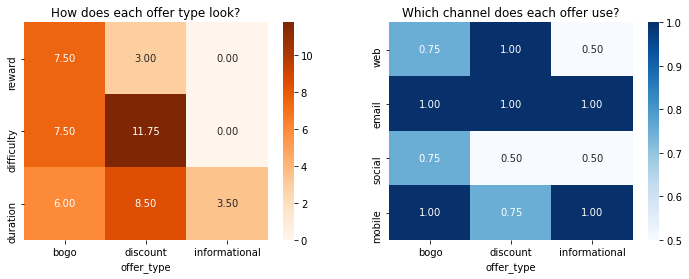

In [145]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

sns.heatmap(portfolio_v1.iloc[:, :5].groupby('offer_type').mean().T, 
            annot=True, fmt='.2f', cmap='Oranges', ax=ax1);
sns.heatmap(portfolio_v1.iloc[:, 3:].groupby('offer_type').mean().T, 
            annot=True, fmt='.2f', cmap='Blues', ax=ax2);

ax1.set(title ='How does each offer type look?');
ax2.set(title ='Which channel does each offer use?');

`discount` offer requires the highest minium spends to get but has the longest duration, assuming customers feel the influence longer that the others. Regardless of offer type, `email` is always used when communicating the offer. `bogo` offer uses the widest number of channels. 

The analysis will be more meaningful when offer type is explored together with customer profile and transction data, which will be done later after mering the dataset.

###  Demographics

In [146]:
profile_v1.shape[0] # total 14825 unique demographic data

14825

In [147]:
profile_v1.head()

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [148]:
# It looks that 'became_member_on' is still object... 
# Convert to datetime object
profile_v1['became_member_on'] = pd.to_datetime(profile_v1['became_member_on'])

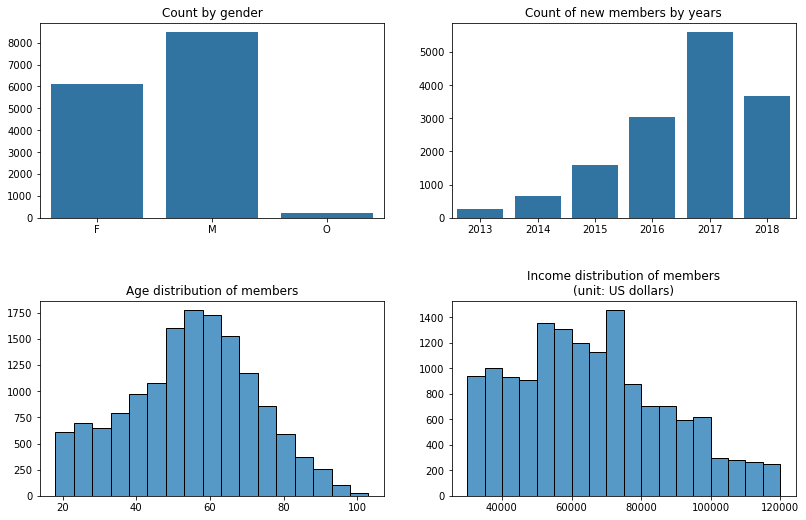

In [149]:
base_color = sns.color_palette()[0]

fig, axes = plt.subplots(2, 2, figsize=(12,8))

fig1 = sns.countplot(x=profile_v1.gender, ax=axes[0,0], color=base_color)
fig2 = sns.countplot(x=profile_v1.became_member_on.dt.year, ax=axes[0,1], color=base_color)
fig3 = sns.histplot(x=profile_v1.age, binwidth=5, ax=axes[1,0])
fig4 = sns.histplot(x=profile_v1.income, binwidth=5000, ax=axes[1,1])

fig1.set(title='Count by gender', xlabel='', ylabel='')
fig2.set(title='Count of new members by years', xlabel='', ylabel='')
fig3.set(title='Age distribution of members', xlabel='', ylabel='')
fig4.set(title='Income distribution of members\n(unit: US dollars)', xlabel='', ylabel='')

plt.tight_layout(pad=3.5)
plt.show()

In [150]:
# Percentage of male, female and others
profile_v1.gender.value_counts() / profile_v1.shape[0]

M    0.572277
F    0.413423
O    0.014300
Name: gender, dtype: float64

In [151]:
# Summary statistics for age
profile_v1.age.describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

In [152]:
# Summary statistics for income
profile_v1.income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

**Gender:** based on this dataset, male customers accounts for 57% of total, more than female (or others). 

**Date:** The growth of new members has increased over time, but it may need better comparison against other metrics like the total visitor volume to validate the organic growth. Also, the data collection period is not clear so 2013 and 2018 data may be biased. 

**Age:** The minimum age is 18 which may be due to age restriction for members. With the median of 55, 50% of the members fall into interquartile range is between 42 and 66. There are some members above 100, which may be true or caused by survey error.

**Income:** Median income is $64,000. The distribution is skewed to the right which seems natural for income distribution.

### Offer completion
Using the cleaned, pivoted dataframe saved in transcript_labeled.csv

In [153]:
# Number of unique customers
transcript_labeled.person.nunique() 

16994

In [154]:
# Number of unique offers should be 10
transcript_labeled.offer_id.nunique() 

10

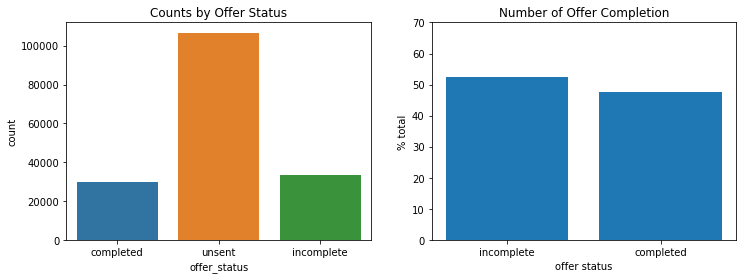

In [164]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

fig1 = sns.countplot(x=transcript_labeled.offer_status, ax=ax1);

# Proportion of offer completion over total sent
offer_sent = transcript_labeled[transcript_labeled.offer_status != 'unsent'].offer_status.value_counts()
fig2 = plt.bar(x=offer_sent.index, height=offer_sent.values / offer_sent.values.sum() * 100);

ax1.set_title('Counts by Offer Status');
ax2.set(title='Number of Offer Completion', ylabel='% total', xlabel='offer status');
ax2.set_yticks(np.arange(0, 70+10, 10))
ax2.set_yticklabels(np.arange(0, 70+10, 10))

plt.show()

In [181]:
transcript_labeled['offer_status'].value_counts() / transcript_labeled.shape[0]

unsent        0.627586
incomplete    0.195522
completed     0.176892
Name: offer_status, dtype: float64

In [182]:
offer_sent / offer_sent.sum()

incomplete    0.525013
completed     0.474987
Name: offer_status, dtype: float64

16,994 unique customers and 10 unique offers are represented in this dataset, which gives 169,940 total mix of possible offers. Around 63% offers are `unsent`, most likely because it was identified that offers do not fulfill the needs of specific customers or the opportunity was misinterpreted and therefore missed, which is the gap that we need to fill in this analysis. 

When considering those offers that were actually sent, about 52% turned out incomplete, which means offers did not influenced customers to purchase.

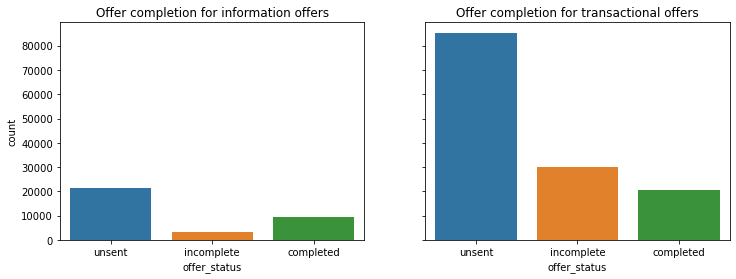

In [180]:
# Get subset data for informational and transactional offers
informational_ids = portfolio_v1.loc[portfolio_v1['offer_type'] == 'informational', 'id'].to_list()

transcript_infos = transcript_labeled[transcript_labeled['offer_id'].isin(informational_ids)]
transcript_trans = transcript_labeled[~transcript_labeled['offer_id'].isin(informational_ids)]

# Visualization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)

# Set order for plots
status_order = ['unsent', 'incomplete', 'completed']

fig1 = sns.countplot(x=transcript_infos.offer_status, ax=ax1, order=status_order);
fig2 = sns.countplot(x=transcript_trans.offer_status, ax=ax2, order=status_order);

ax1.set_title('Offer completion for information offers');
ax2.set_title('Offer completion for transactional offers');
ax2.set(ylabel='')

plt.show()

In the split data, offer completion is relatively higher than incompletion for informational offers.

### Purchased but incomplete offers
Earlier it was identified that there are some offers incorrectly marked completed without customers actually viewing them. From the business perspective, this group of customers are not influenced by offers when purchasing products, it may not be a good idea to send offers. 

In [184]:
# Creating some conditions
cond_purchased = transcript_labeled.amount.notnull()
cond_incomplete = transcript_labeled.offer_status == 'incomplete'
cond_viewed = transcript_labeled['offer viewed'].notnull()

print(f'# offer incomplete (total): {transcript_labeled[cond_incomplete].shape[0]}')
print(f'# offer incomplete but purchased: {transcript_labeled[cond_incomplete & cond_purchased].shape[0]}')
print(f'# offer incomplete and viewed after purchase: {transcript_labeled[cond_incomplete & cond_purchased & cond_viewed].shape[0]}')

# offer incomplete (total): 33227
# offer incomplete but purchased: 8244
# offer incomplete and viewed after purchase: 3708


### Purchased amounts and rewards

In [185]:
transcript_labeled.amount.describe()

count    28996.000000
mean        20.388305
std         39.952649
min          0.150000
25%         10.817500
50%         16.610000
75%         23.390000
max       1015.730000
Name: amount, dtype: float64

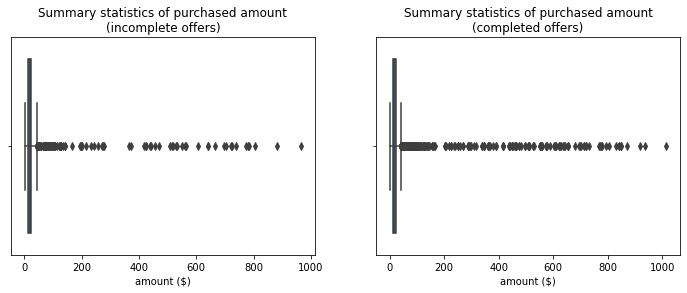

In [186]:
# Two box plot graphs 
# fig1: incomplete but putchased, fig2: completed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig1 = sns.boxplot(x=transcript_labeled[cond_incomplete].amount, ax=ax1);
fig2 = sns.boxplot(x=transcript_labeled[~cond_incomplete].amount, ax=ax2);

ax1.set(title='Summary statistics of purchased amount\n(incomplete offers)', xlabel='amount ($)', ylabel='')
ax2.set(title='Summary statistics of purchased amount\n(completed offers)', xlabel='amount ($)', ylabel='')

plt.show()

Purchase amount varies from 15 cents to 1015 dollars, while 75% fall below 23.39 dollars per receipt. Now let's see visualizations after removing outliers. Outliers here are difined as observations that are outside 1.5 x interquantile range below Q1 and above Q3.

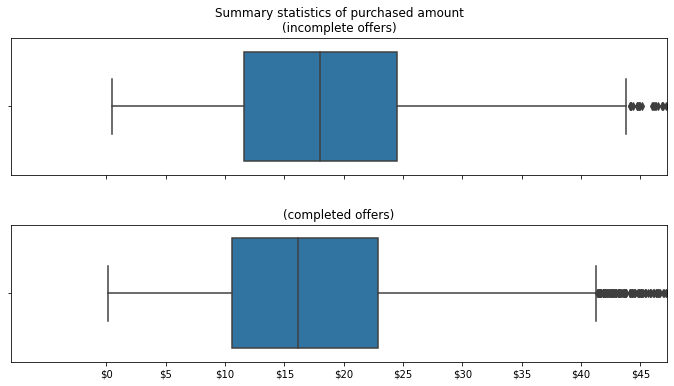

In [187]:
# Prepare for statistics
Q1_purchased = transcript_labeled.amount.describe()['25%']
Q3_purchased = transcript_labeled.amount.describe()['75%']
IQR_purchased = Q3_purchased - Q1_purchased
outlier_lower = Q1_purchased - 1.5 * IQR_purchased
outlier_upper = Q3_purchased + 1.5 * IQR_purchased

# Two box plot graphs 
# fig1: incomplete but putchased, fig2: completed

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
fig1 = sns.boxplot(x=transcript_labeled[cond_incomplete].amount, ax=ax1);
fig2 = sns.boxplot(x=transcript_labeled[~cond_incomplete].amount, ax=ax2);

ax1.set(title='Summary statistics of purchased amount\n(incomplete offers)',xlabel='', ylabel='')
ax2.set(title='(completed offers)', xlabel='', ylabel='')

ax1.set_xticks(np.arange(0, 100, 5))
ax1.set_xticklabels([f'${str(n)}' for n in np.arange(0, 100, 5)])
ax1.set_xlim(outlier_lower, outlier_upper+5)

plt.tight_layout(pad=3)

plt.show()

Those customers who purchased products without viewing offers have slightly higher spends when compared with those purchases influenced by others. It is self-explanatory as completed offers should have some discounts applied to them. 

<a id="explore-part2"></a>
# `Section4` Exploratory analysis - Part2

In this section, we would like to go deeper into offer completion by offer type and demographics. In order to do this, we will merge the datasets.

## Prepare the subset data
`unsent` offer status does not clearly show if customers completed offers or not, so we will subset those offers that customers actually received.

In [228]:
# Get all records that were sent
offer_sent = transcript_labeled[transcript_labeled['offer_status'] != 'unsent']

## Offer completion by offer type

In [189]:
completion_by_offer = offer_sent.groupby(['offer_id', 'offer_status']).size().unstack()
completion_by_offer

offer_status,completed,incomplete
offer_id,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,1207,5167
2298d6c36e964ae4a3e7e9706d1fb8c2,3820,2505
2906b810c7d4411798c6938adc9daaa5,1891,4394
3f207df678b143eea3cee63160fa8bed,3635,2696
4d5c57ea9a6940dd891ad53e9dbe8da0,2436,3894
5a8bc65990b245e5a138643cd4eb9837,5674,646
9b98b8c7a33c4b65b9aebfe6a799e6d9,1922,4433
ae264e3637204a6fb9bb56bc8210ddfd,2314,4060
f19421c1d4aa40978ebb69ca19b0e20d,3129,3133


In [190]:
# Compute completion rate
completion_by_offer['completion_rate'] = completion_by_offer['completed'] / completion_by_offer.sum(axis=1).values
completion_by_offer['incompletion_rate'] = completion_by_offer['incomplete'] / completion_by_offer.sum(axis=1).values

In [191]:
# Sort by completed rate
completion_by_offer.sort_values('completion_rate', ascending=False, inplace=True)

In [192]:
# Merge the data sets
completion_by_offer = pd.merge(completion_by_offer, portfolio_v1, left_on='offer_id', right_on='id', how='left')

In [193]:
# Confirm if correctly merged
assert completion_by_offer.shape[0] == 10, "The resulting dataframe is not merged successfully "

completion_by_offer.head(3) 

,completed,incomplete,completion_rate,incompletion_rate,reward,difficulty,duration,offer_type,id,web,email,social,mobile
0,5674,646,0.897785,0.102201,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
1,4033,2299,0.636924,0.363040,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
2,3820,2505,0.603953,0.396010,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1


In [194]:
# Get more intuitive offer names with mix of values

def get_offer_name(df, cols):
    ''' Concatenate cell data from a dataframe to formulate a unique offer name
    For example, if input cols are 'offer_type', 'reward', 'difficulty', 'duration'
    and respective values are 'discount', 2, 10, 10, returning name will be disc021010
    
    INPUT: 
        df: a dataframe that contains information for offer names 
            i.e. 'offer_type', 'reward', 'difficulty', 'duration'
        cols: columns that values will be extracted from
        
    OUTPUT: 
        a list of unique offer name
    
    '''
    
    # Get the subset of data needed
    df_subset = df[cols]
    
    # Instantiate a list of offer names
    offer_names = list()
    
    # Iterate by row
    for idx, values in df_subset.iterrows():
        
        # Instantiate name
        name = ''
        
        for item in values:
            # If item is string, get the first 4 letters
            if type(item) == str:
                item = item[:4]
            
            # If item is integer, check if the value < 10, 
            # then add '0' in front and transform it to string
            if type(item) == int and item < 10:
                item = '0' + str(item)
            else:
                item = str(item)
            
            # Concatenate item 
            name += item
        
        # Add completed name to a list of offer names
        offer_names.append(name)
        
        
    return offer_names
            

In [195]:
col_names = ['offer_type', 'reward', 'difficulty', 'duration']

# Add the offer names to the dataframe and set it as an index
completion_by_offer['offer_name'] = get_offer_name(completion_by_offer, col_names)
completion_by_offer.set_index('offer_name', inplace=True)

In [196]:
completion_by_offer # good!

,completed,incomplete,completion_rate,incompletion_rate,reward,difficulty,duration,offer_type,id,web,email,social,mobile
offer_name,,,,,,,,,,,,,
info000003,5674,646,0.897785,0.102201,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
disc021010,4033,2299,0.636924,0.363040,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
disc030707,3820,2505,0.603953,0.396010,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
info000004,3635,2696,0.574159,0.425802,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
bogo050505,3129,3133,0.499681,0.500279,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
bogo101005,2436,3894,0.384834,0.615128,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
bogo101007,2314,4060,0.363037,0.636926,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
bogo050507,1922,4433,0.302439,0.697528,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
disc021007,1891,4394,0.300875,0.699091,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


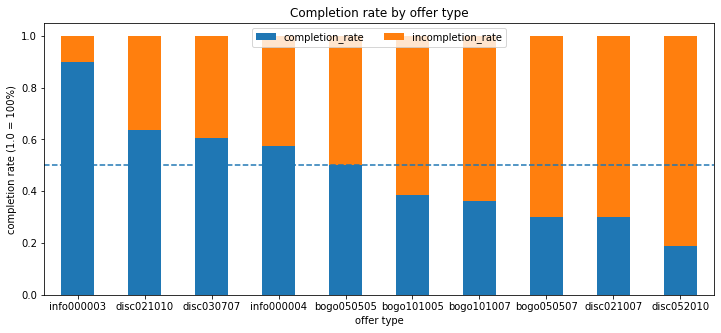

In [197]:
completion_by_offer[['completion_rate', 'incompletion_rate']].plot(kind='bar', stacked=True, figsize=(12,5));

plt.title('Completion rate by offer type')
plt.xlabel('offer type')
plt.xticks(rotation=0)
plt.ylabel('completion rate (1.0 = 100%)')
plt.legend(loc='upper center', ncol=4)
plt.hlines(0.5, xmin=-10, xmax=100, linestyles='--', colors=sns.color_palette()[0])
plt.show()

Informational offers have generally higher completion rate. Depsite slightly longer duration, completion rate of `info000003` is a lot higher than that of `info000004`. The difference possibly comes from type of distribution channel: `info000003` used social whereas `info info000004` used web. 

For transactional data, the completion rate is over 50% for `disc021010`, `disc030707`, `bogo050505`. 

`disc021010`, `disc030707` actually gives out less rewards with relatively higher difficulties, which is interesting. On ther other hand, they have relatively higher duration allowed for redemption and been distributed across all avilable channels - so the offers have been exposed to customers longer and wider.

Note that there are two offers that are informational and they have completion rate of 0%, which originally had only two events: offer received and offer viewed.

In [199]:
# Saving the dataframe in case of any future use
completion_by_offer.to_csv('data/completion_by_offer.csv', index=True)

## Offer completion by demographics

In [240]:
# Merge with profile_v1 dataset
completion_by_demo = pd.merge(offer_sent, profile_v1, left_on='person', right_on='id', how='left')

# Drop the duplicated id column
completion_by_demo = completion_by_demo.drop(columns='id')

completion_by_demo.head()

,person,offer_id,offer received,offer viewed,offer completed,offer_status,amount,reward,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,372.0,NaN,completed,NaN,NaN,M,33.0,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,192.0,NaN,completed,NaN,NaN,M,33.0,2017-04-21,72000.0
2,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,6.0,NaN,completed,NaN,NaN,O,40.0,2018-01-09,57000.0
3,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,336.0,354.0,NaN,completed,NaN,NaN,O,40.0,2018-01-09,57000.0
4,0020c2b971eb4e9188eac86d93036a77,5a8bc65990b245e5a138643cd4eb9837,504.0,660.0,NaN,completed,NaN,NaN,F,59.0,2016-03-04,90000.0


The below heatmap visualization was inspired by https://moonbooks.org/Articles/How-to-add-text-units--etc-in-a-heatmap-cell-annotations-using-seaborn-in-python-/

In [278]:
completion_by_gender = completion_by_demo.groupby(['gender', 'offer_status']).size().unstack()
completion_by_gender

offer_status,completed,incomplete
gender,,
F,12559,10249
M,14836,16809
O,483,286


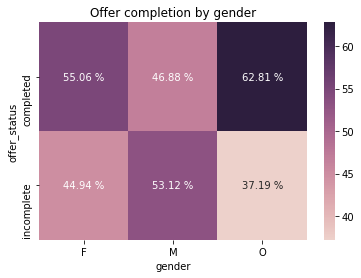

In [284]:
completion_by_gender = completion_by_demo.groupby(['offer_status', 'gender']).size().unstack()

cmap = sns.cubehelix_palette(as_cmap=True)
fig = sns.heatmap(completion_by_gender / completion_by_gender.sum(axis=0) * 100, 
                  annot=True, fmt='.2f', cmap=cmap)

# Fine tune annotation
for t in fig.texts: 
    t.set_text(t.get_text() + " %")
    
plt.title('Offer completion by gender')
plt.show()

Female customers generally have higher completion rate than male. Male customers have less offers completed than incomplete.

In [299]:
# Divide each record with age group
bin_edges = np.arange(10, 100+10, 10)
bin_label = [str(n)+ 's' for n in bin_edges[:-1]]
completion_by_demo['age_group'] = pd.cut(completion_by_demo.age, bins=bin_edges, labels=bin_label)

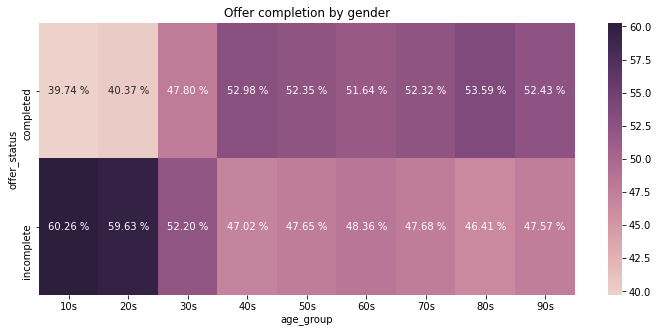

In [311]:
completion_by_age = completion_by_demo.groupby(['offer_status', 'age_group']).size().unstack()

cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(12,5))
fig = sns.heatmap(completion_by_age / completion_by_age.sum(axis=0) * 100, 
                  annot=True, fmt='.2f', cmap=cmap)

# Fine tune annotation
for t in fig.texts: 
    t.set_text(t.get_text() + " %")
    
plt.title('Offer completion by gender')
plt.show()

Completion rate is low (lower than incomplete) for customers below 30s whereas those above 40s have completion rate higher than 50%.

In [328]:
# Divide each record with income group
bin_edges = np.arange(completion_by_demo.income.min(), 
                       completion_by_demo.income.max() + 10000, 10000)
bin_label = ['$' + str(int(n))[:-3] + 'k' for n in bin_edges[:-1]]
completion_by_demo['income_group'] = pd.cut(completion_by_demo.income, bins=bin_edges, labels=bin_label)

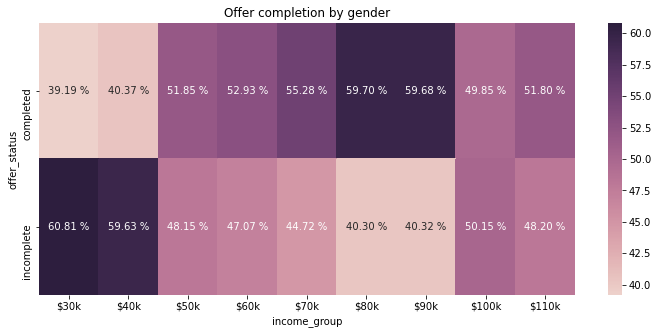

In [329]:
completion_by_income = completion_by_demo.groupby(['offer_status', 'income_group']).size().unstack()

cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(12,5))
fig = sns.heatmap(completion_by_income / completion_by_income.sum(axis=0) * 100, 
                  annot=True, fmt='.2f', cmap=cmap)

# Fine tune annotation
for t in fig.texts: 
    t.set_text(t.get_text() + " %")
    
plt.title('Offer completion by gender')
plt.show()

Completion rate is lower for customers with income less than \\$50k. The higest completion rate is observed in the income group between \\$80k and \\$100k.

<a id="work"></a>
[to modules](#modules)